# The Sparks Foundation - Data Science and Business Analytics Internship

## GRIP @ The Sparks Foundation



#### By: Naveen Kumar, Batch: GRIP June'23

# Importing Libraries to be needed

In [12]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading the data using the link 

In [13]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()
x=data['Hours']
x


0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

# Plotting the dataset
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

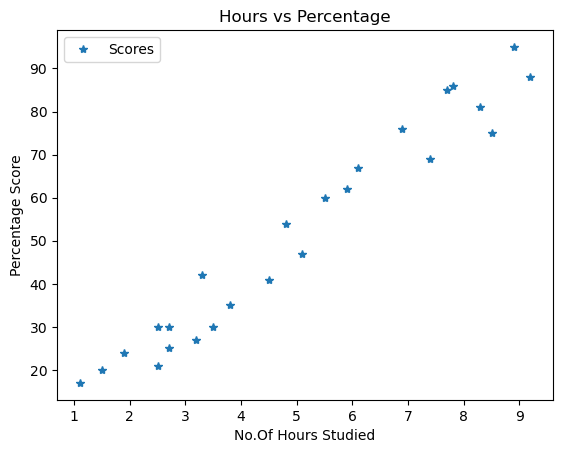

In [14]:
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('No.Of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)

In [15]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.1, random_state=0)

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

# Plotting the regression line on the dataset

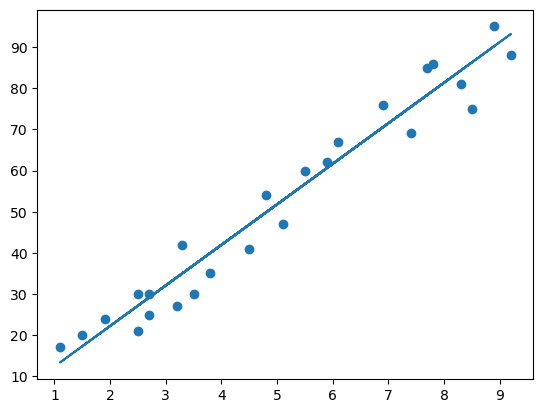

In [18]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [19]:
print(X_test) # Testing data - In Hours
y_pred =regressor.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]]


array([17.30220982, 34.05529402, 75.44526674])

# DataFrame of Actual and Predicted Scores

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


# Finding Scores Corresponding to the asked no. of hours

In [21]:
hours = np.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.67656425238496


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.3994503136120064
